<a href="https://colab.research.google.com/github/Nik211885/Hello_HTML5/blob/master/linear_regrssion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./sample_data/california_housing_train.csv',usecols=['total_rooms','total_bedrooms','median_income','households','median_house_value','population'])

In [3]:
df.head(10)

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,720.0,174.0,333.0,117.0,1.6509,85700.0
3,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,812.0,168.0,375.0,158.0,1.7083,48500.0
8,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,1497.0,309.0,787.0,271.0,2.1908,48100.0


from matplotlib import pyplot as plt
_df_0['total_rooms'].plot(kind='hist', bins=20, title='total_rooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['total_bedrooms'].plot(kind='hist', bins=20, title='total_bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['households'].plot(kind='hist', bins=20, title='households')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='total_bedrooms', y='population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='population', y='households', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='households', y='median_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['total_bedrooms'].plot(kind='line', figsize=(8, 4), title='total_bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['households'].plot(kind='line', figsize=(8, 4), title='households')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
print('So du lieu bi nan')
for label in df.columns[0:]:
  print(f'{label}:{df[label].isnull().sum()}')


So du lieu bi nan
total_rooms:0
total_bedrooms:0
population:0
households:0
median_income:0
median_house_value:0


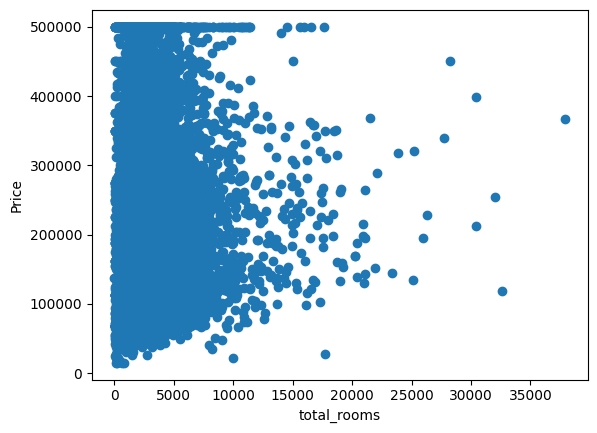

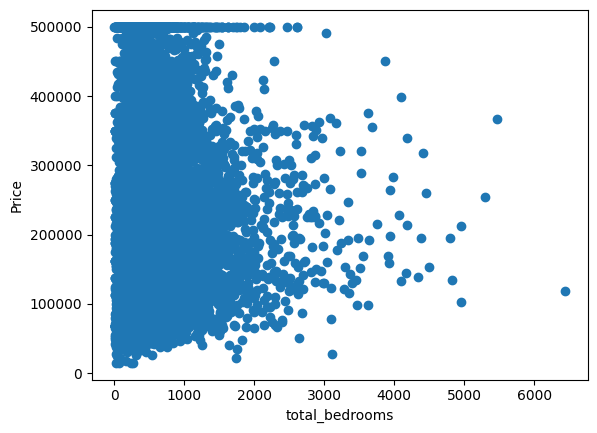

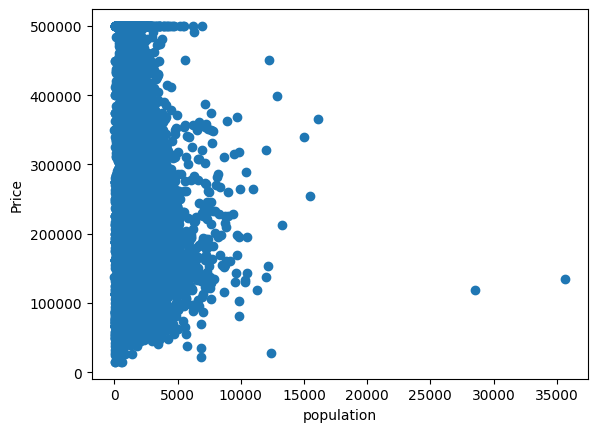

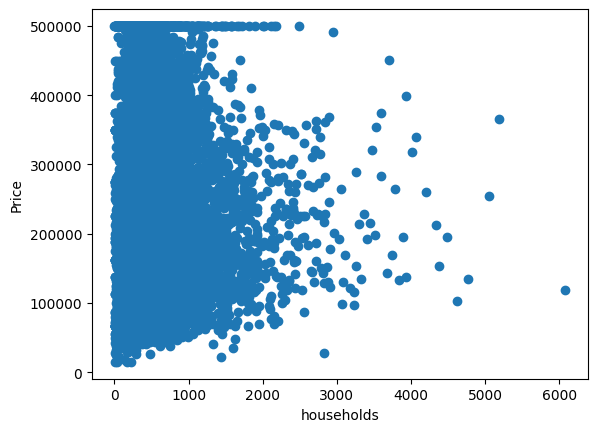

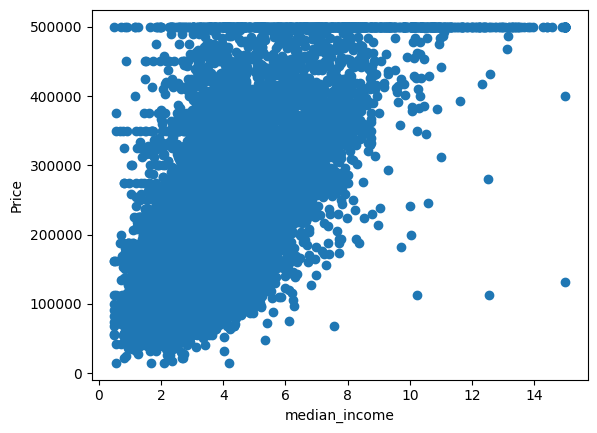

In [5]:
for label in df.columns[:-1]:
  plt.scatter(df[label],df['median_house_value'])
  plt.xlabel(label)
  plt.ylabel('Price')
  plt.show()

In [543]:
x_train = np.array(df[df.columns[:-1]]).astype('float')
y_train = np.array(df[df.columns[-1]]).reshape(-1,1).astype('float').reshape(-1,1)

In [512]:
print(x_train.shape)

(17000, 5)


In [515]:
def linear_model_funtion(w,b,x):
  return np.sum(w*x) + b

In [516]:
def cost_funtion(w,x,b,y):
  cost = 0
  m = y.size
  for i in range(m):
    cost += (linear_model_funtion(w,b,x[i])-y[i])**2
  return cost/(2*m)

In [517]:
y_train.shape

(17000, 1)

In [518]:
y_train.size

17000

In [519]:
x_train.shape

(17000, 5)

In [520]:
x_train[0,0]

5612.0

In [523]:
x_train[:,4].reshape(-1,1).shape

(17000, 1)

In [539]:
def scale_data(x,scale_mode=None):
  m = x.shape[1]
  match scale_mode:
    case 0:
      '''Mean nermalization scaler
        X = (X - Xtb)/(X_max - X_min)
      '''
      for i in range(m):
        x[:,i] = (x[:,i] - np.average(x[:,i])) / (np.max(x[:,i]) - np.min(x[:,i]))
    case 1:
      '''Z-score
      X = (X - Xtb)/std
      '''
      for i in range(m):
        x[:,i] = (x[:,i] - x[:,i].mean()) / np.std(x[:,i])
    case _:
      '''default X/Xmax '''
      for i in range(m):
        x[:,i] = (x[:,i]/np.max(x[:,i]))
  return x


In [544]:
x_train = scale_data(x_train)

In [545]:
np.max(x_train[:,0])

1.0

In [546]:
x_train

array([[0.14792946, 0.19906905, 0.02844571, 0.07760605, 0.09957267],
       [0.2016501 , 0.29495733, 0.0316406 , 0.07612627, 0.12133252],
       [0.01897883, 0.02699767, 0.00933244, 0.01923709, 0.11005927],
       ...,
       [0.07056436, 0.08238945, 0.03486352, 0.07497534, 0.20208532],
       [0.07043256, 0.08564779, 0.03637688, 0.07859257, 0.13197912],
       [0.04797427, 0.04654771, 0.02258842, 0.04439329, 0.20097866]])

In [547]:
np.min(x_train[:,4])

0.03332644449037007

In [536]:
def gradient(w,b,x,y):
  m, columns = x.shape
  grd_w = np.zeros(columns)
  grd_b = 0
  for j in range(columns):
    for i in range(m):
      if(not grd_b):
        grd_b = (linear_model_funtion(w,b,x[i]) - y[i])
      grd_w[j] += (linear_model_funtion(w,b,x[i]) - y[i]) * x[i][j]
  return [grd_w/m ,grd_b/m]


In [86]:
def _learning_rate(w,b,x,y,lr = 0.01):
  check = False
  cost = cost_funtion(w,x,b,y)
  grd_w ,grd_b = gradient(w,b,x,y)
  while(True):
    tmp_w = w.copy()
    tmp_b = b
    for i in range(grd_w.size):
      tmp_w[i] -= lr*grd_w[i]
    tmp_b -= lr*grd_b
    if(cost_funtion(tmp_w,x,tmp_b,y) > cost):
      check = True
      lr = lr /10
    elif(not check):
      lr = lr *10
    else:
      return lr


In [88]:
def gradient_descent(w,b,x,y,learning_rate=0.001):
  grd_w, grd_b = gradient(w,b,x,y)
  for i in  range(w.size):
    w[i] -= learning_rate*grd_w[i]
  b -= learning_rate*grd_b
  return w,b

In [349]:
def linear_regrssion_model(x,y,learning_rate=0.01):
  w = np.zeros(x_train.shape[1])
  b=0
  loss=[cost_funtion(w,x,b,y)]
  lr = _learning_rate(w,b,x,y,lr = learning_rate)
  for _ in range(50):
    w,b = gradient_descent(w,b,x,y,learning_rate=lr)
    loss.append(cost_funtion(w,x,b,y))
  return [w,b,loss]

In [548]:
w, b, loss = linear_regrssion_model(x_train,y_train)

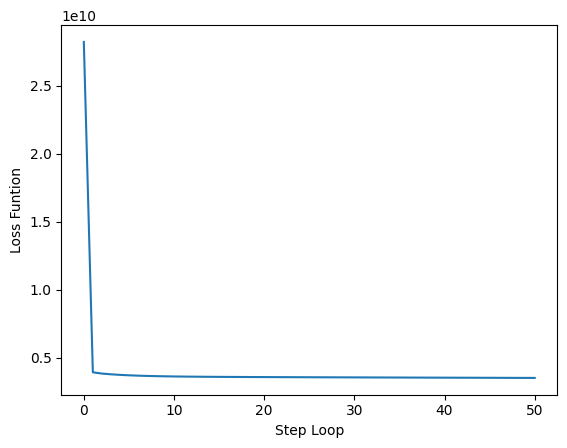

In [550]:
plt.plot(np.arange(51),loss)
plt.xlabel('Step Loop')
plt.ylabel('Loss Funtion')
plt.show()

In [551]:
print(w)

[-106410.52794056  145956.17149754  -65743.43641222  145415.66341171
  728334.72824613]


In [552]:
print(b)

[-960.63900496]


In [553]:
cost_funtion(w,x_train,b,y_train)

array([3.51748048e+09])

#Test

In [554]:
test = pd.read_csv('./sample_data/california_housing_test.csv',usecols=['total_rooms','total_bedrooms','median_income','households','median_house_value','population'])

In [555]:
test.head()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,67.0,15.0,49.0,11.0,6.1359,330000.0
4,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [556]:
x_test = np.array(test[test.columns[:-1]]).astype('float')
y_test = np.array(test[test.columns[-1]]).astype('float').reshape(-1,1)

In [558]:
x_test = scale_data(x_test)

In [559]:
np.max(x_test)

1.0

In [560]:
np.min(x_test)

-0.2954902675983179

In [581]:
x_test.shape

(3000, 5)

In [562]:
y_pred = []
for i in range(y_test.size):
  y_pred.append(linear_model_funtion(w,b,x_test[i]))

In [563]:
y_pred = np.array(y_pred)

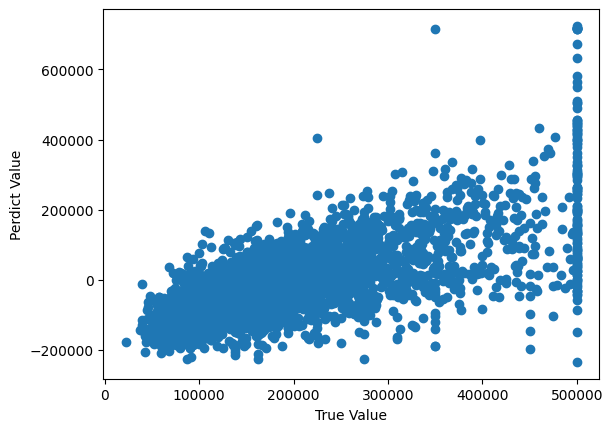

In [564]:
plt.scatter(y_test,y_pred)
plt.xlabel('True Value')
plt.ylabel('Perdict Value')
plt.show()

In [565]:
y_pred.shape

(3000, 1)

In [566]:
y_test.shape

(3000, 1)

In [567]:
SSE = np.sum((y_pred - y_test)**2)

In [568]:
SSE

154241288184747.3

In [507]:
SST = np.sum((y_test - y_test.mean())**2)

In [508]:
SST

38375395015998.12

In [509]:
R2 = 1 - SSE/SST

In [569]:
R2

0.44974124010104144